In [52]:
import pandas as pd
import numpy as np
import seaborn as sns

# Charger le fichier de données
file_path = 'data.csv'
data = pd.read_csv(file_path)

# Remplacer les strings par des nombres
data["sex"].replace(['male', 'female'], [0, 1], inplace=True)
data["smoker"].replace(['no', 'yes'], [0, 1],  inplace=True)
data_model = data.drop("region", axis=1)

# Afficher les premières lignes du fichier pour un aperçu
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [53]:
# Vérification des informations manquantes et des doublons
missing_data = data.isnull().sum()
duplicates = data.duplicated().sum()

missing_data, duplicates



(age         0
 sex         0
 bmi         0
 children    0
 smoker      0
 region      0
 charges     0
 dtype: int64,
 1)

In [54]:
# Suppression du doublon
data = data.drop_duplicates()

# Est-ce qu’il y a des valeurs aberrantes ?


iqr_age: 24.0
Axes(0.125,0.11;0.775x0.77)


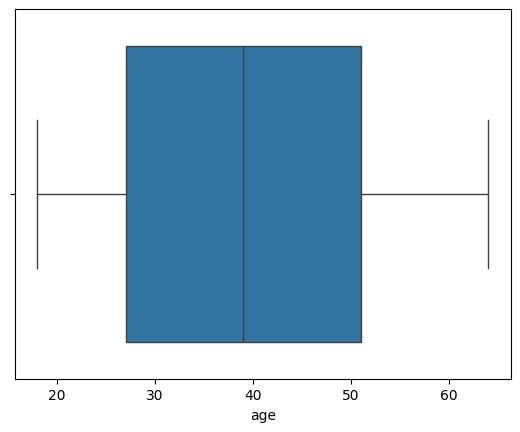

In [55]:
# Calculer l'interquartile range de Age
q3, q1 = np.percentile(data['age'], [75,25])
iqr_age = q3 - q1
boxplot_age = sns.boxplot(x=data['age'])
print(f"iqr_age: {iqr_age}") # 24.0
print(boxplot_age)

iqr_bmi: 8.410000000000004
Axes(0.125,0.11;0.775x0.77)


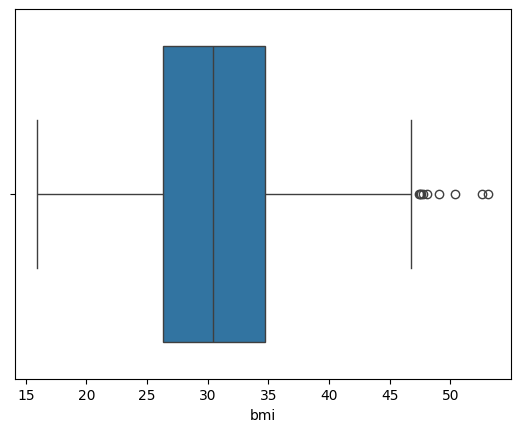

In [56]:
# Calculer l'interquartile range de bmi
q3, q1 = np.percentile(data['bmi'], [75,25])
iqr_bmi = q3 - q1
boxplot_bmi = sns.boxplot(x=data['bmi'])
print(f"iqr_bmi: {iqr_bmi}") # 8.410000000000004
print(boxplot_bmi)

In [57]:
# Calculer les valeurs abberants de bmi
q3, q1 = np.percentile(data['bmi'], [75,25])
iqr_bmi = q3 - q1
borne_inférieure_bmi = q1 -1.5 * iqr_bmi
borne_supérieure_bmi = q3 + 1.5 * iqr_bmi
print(f"borne_inférieure_bmi {borne_inférieure_bmi}, borne_supérieure_bmi : {borne_supérieure_bmi}")

borne_inférieure_bmi 13.674999999999994, borne_supérieure_bmi : 47.31500000000001


iqr_children: 2.0
Axes(0.125,0.11;0.775x0.77)


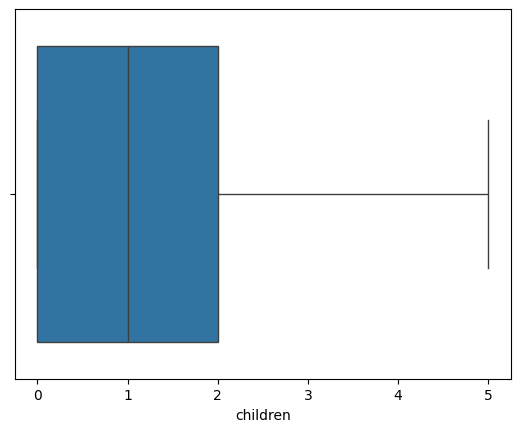

In [58]:
# Calculer l'interquartile range de children
q3, q1 = np.percentile(data['children'], [75,25])
iqr_children = q3 - q1
boxplot_children = sns.boxplot(x=data['children'])
print(f"iqr_children: {iqr_children}") # 2.0
print(boxplot_children)

In [79]:
q3, q1 = np.percentile(data['children'], [75,25])
borne_inférieure_children = q1 -1.5 * iqr_children
borne_supérieure_children = q3 + 1.5 * iqr_children
print(f"borne_inférieure_children {borne_inférieure_children}, borne_supérieure_children : {borne_supérieure_children}")

borne_inférieure_children -3.0, borne_supérieure_children : 5.0


In [59]:
data["bmi"].describe()

count    1337.000000
mean       30.663452
std         6.100468
min        15.960000
25%        26.290000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64

In [61]:
data["children"].describe()

count    1337.000000
mean        1.095737
std         1.205571
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

In [62]:
data["age"].describe()

count    1337.000000
mean       39.222139
std        14.044333
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [63]:
data["charges"].describe()

count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64

Analyse univariée de chaque variable.